In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('data/Transactions.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
isfraud = df.groupby(["type", "isFraud", "isFlaggedFraud"])["type"].count()
isfraud_df = isfraud.to_frame(name='count').reset_index()
isfraud_df.columns = ["type", "Actual Fraud", "Flagged Fraud", "Count"]
isfraud_df["Actual Fraud"] = isfraud_df["Actual Fraud"].apply(lambda x: "Yes" if x==1 else "No")
isfraud_df["Flagged Fraud"] = isfraud_df["Flagged Fraud"].apply(lambda x: "Yes" if x==1 else "No")
isfraud_df

,type,Actual Fraud,Flagged Fraud,Count
0,CASH_IN,No,No,1399284
1,CASH_OUT,No,No,2233384
2,CASH_OUT,Yes,No,4116
3,DEBIT,No,No,41432
4,PAYMENT,No,No,2151495
5,TRANSFER,No,No,528812
6,TRANSFER,Yes,No,4081
7,TRANSFER,Yes,Yes,16


#### Distribution of transactions by type

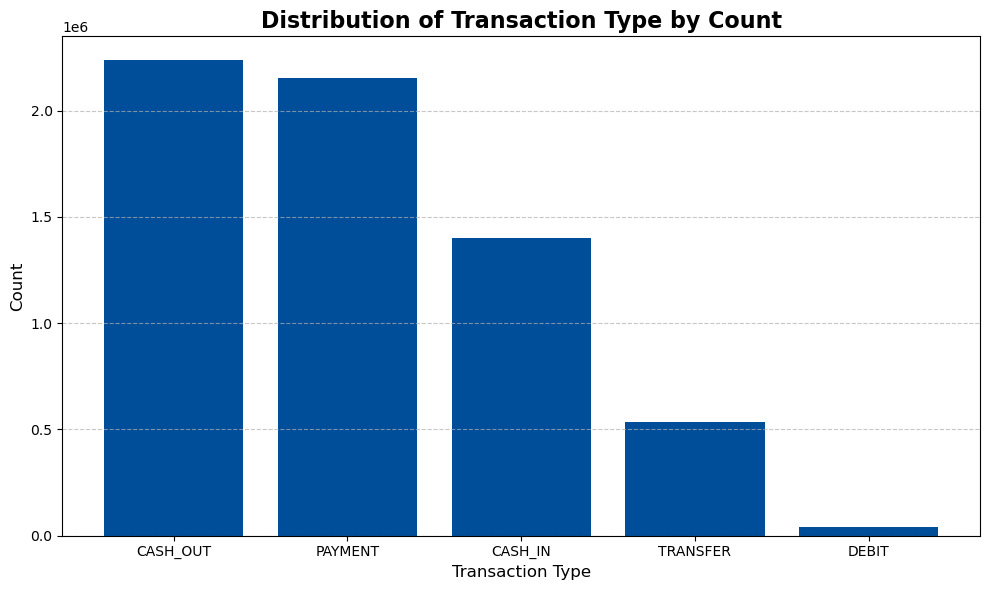

In [ ]:
type_counts = isfraud_df.groupby("type")["Count"].sum().reset_index()
type_counts.columns = ["Type", "Total Count"]
type_counts = type_counts.sort_values(by='Total Count', ascending=False)

plt.figure(figsize=(10, 6)) # Set the size of the plot

# Plot the bar chart
color = '#004d99'
plt.bar(
    type_counts['Type'],
    type_counts['Total Count'],
    color=color
)
plt.title(
    'Distribution of Transaction Type by Count',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Distribution of transaction types that where targeted.

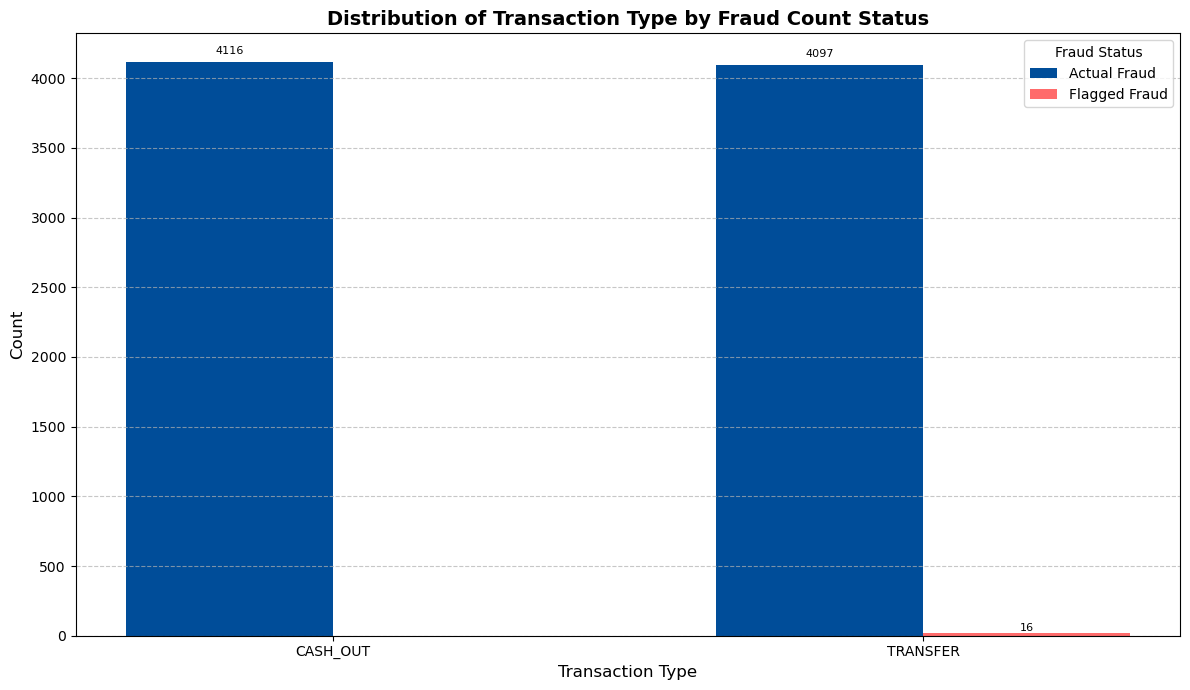

In [5]:
actual_fraud_counts = isfraud_df[isfraud_df["Actual Fraud"] == "Yes"].groupby("type")["Count"].sum()
flagged_fraud_counts = isfraud_df[isfraud_df["Flagged Fraud"] == "Yes"].groupby("type")["Count"].sum()

combined_df = pd.DataFrame({
    'Actual Fraud': actual_fraud_counts,
    'Flagged Fraud': flagged_fraud_counts
}).fillna(0).reset_index()

plot_df = combined_df.melt(
    id_vars='type',
    value_vars=['Actual Fraud', 'Flagged Fraud'],
    var_name='Category',
    value_name='Count'
)
types = plot_df['type'].unique()
categories = plot_df['Category'].unique()
n_categories = len(categories)
x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
# Define the colors
color_map = {
    'Actual Fraud': '#004d99',
    'Flagged Fraud': '#ff6b6b'
}
# Iterate through categories and plot bars
for i, category in enumerate(categories):
    # Filter data for the current category
    subset = plot_df[plot_df['Category'] == category]
    subset_counts = subset.set_index('type').reindex(types)['Count'].fillna(0)

    # Bar position
    rects = ax.bar(x + i*width - width/2, subset_counts, width,
                   label=category, color=color_map[category])

    for rect in rects:
        height = rect.get_height()
        if height > 0: # Only label non-zero bars
            ax.text(rect.get_x() + rect.get_width() / 2., 1.01 * height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=8)
# Set the title and labels
ax.set_title(
    'Distribution of Transaction Type by Fraud Count Status',
    fontsize=14,
    fontweight='bold'
)
ax.set_xlabel('Transaction Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.legend(title='Fraud Status', loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

#### Confusion matrix to identify True positives and False Negatives.

<Figure size 800x600 with 0 Axes>

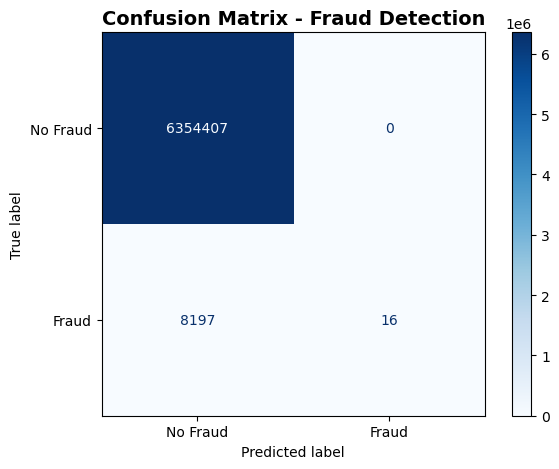

In [6]:
df = df.rename(columns = {"isFraud": "Actual Fraud", "isFlaggedFraud": "Detected Fraud"})

cm = confusion_matrix(df["Actual Fraud"], df["Detected Fraud"])
display_labels = ['No Fraud', 'Fraud']

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Fraud Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
